<a href="https://colab.research.google.com/github/arma1998/transport/blob/main/Transport_Demand_Prediction_arman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>
**Project on Regression**

**Team Member: Arman Ansari**

Github link:https://github.com/arma1998/transport/tree/main

# **SCOPE OF THE PROJECT-**

###The scope of project is to create a predictive model using traffic data provided to us and historic bus ticket sales data from Mobiticket to predict the number of tickets that will be sold for buses into Nairobi from cities.

###The data used to train the model will be historic hourly traffic patterns in Nairobi and historic ticket purchasing data for 14 bus routes into Nairobi from 17 October 2017 and 20 April 2018, and includes the place or origin, the scheduled time of departure, the channel used for the purchase, the type of vehicle, the capacity of the vehicle, and the assigned seat number.

# **PROBLEM DESCRIPTION-**

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

  # **DATA PREPPING**

##**Mount A Drive-**

## **Importing the libraries-**

In [9]:
#Importing libraries for Exploratory data Analysis
import numpy as np # For some math operations on arrays in predictions.
import pandas as pd  # To upload the large data set and wrangling the data.
import matplotlib.pyplot as plt  # Used for visualization of dataset.
import seaborn as sns  # Used for visualization of dataset.
import datetime # Used for datetime operations.
%matplotlib inline

In [3]:
# Loading Data set of csv
from google.colab import files
uploaded =files.upload()

Saving train_revised.csv to train_revised.csv


In [4]:
dpdt=pd.read_csv('train_revised.csv')

## **First five values of given dataset**

In [5]:
dpdt.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


# **Understanding The data**

## **Some Basic Information about Data set-**

In [6]:
dpdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
# To observe the column variables length,type and shape.
list(dpdt.columns)

['ride_id',
 'seat_number',
 'payment_method',
 'payment_receipt',
 'travel_date',
 'travel_time',
 'travel_from',
 'travel_to',
 'car_type',
 'max_capacity']

# **Checking the Null values for cleaning the Dataset for further analysis.**

In [10]:
dpdt.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

**Comments-**
We don't see any null values in the dataset now.

so let us explore the dataset more.

# **EXPLORATRY DATA ANALYSIS - DATA VISUALIZATION**

## **values count for payment mode, car type, maximum capacity**



**Comment**

* There are two type of payment methods people have used to buy the tickets.

* There are two type of cars `Bus` and `shuttle` and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers.

## **Finding Our Target Variable**

As we do not have labeled/Target variable ,first we have to find labeled variable.

So, I will find count of each ride_id and that will be number_of_ticket as our target variable.

In [14]:
label=dpdt.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


#### As we found our target variable so let's dropout the duplicate values from ride_id

In [15]:
dpdt=dpdt.drop_duplicates("ride_id")

In [16]:
dpdt.shape

(6249, 10)

lets create final dataset having dependent and independent variables

In [17]:
dpdt = dpdt.merge(label, how="left",on="ride_id")
dpdt.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Lets drop out some irrelevant features, which are not going to help for predicting the target variable

In [18]:
dpdt = dpdt.drop(['seat_number','payment_method','payment_receipt'], axis=1)

## **Removing Constant Features**


We need to first remove the constant features.

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
dpdt.drop(["travel_to"],axis=1,inplace=True)

## **Travel_from v/s number_of_ticket**

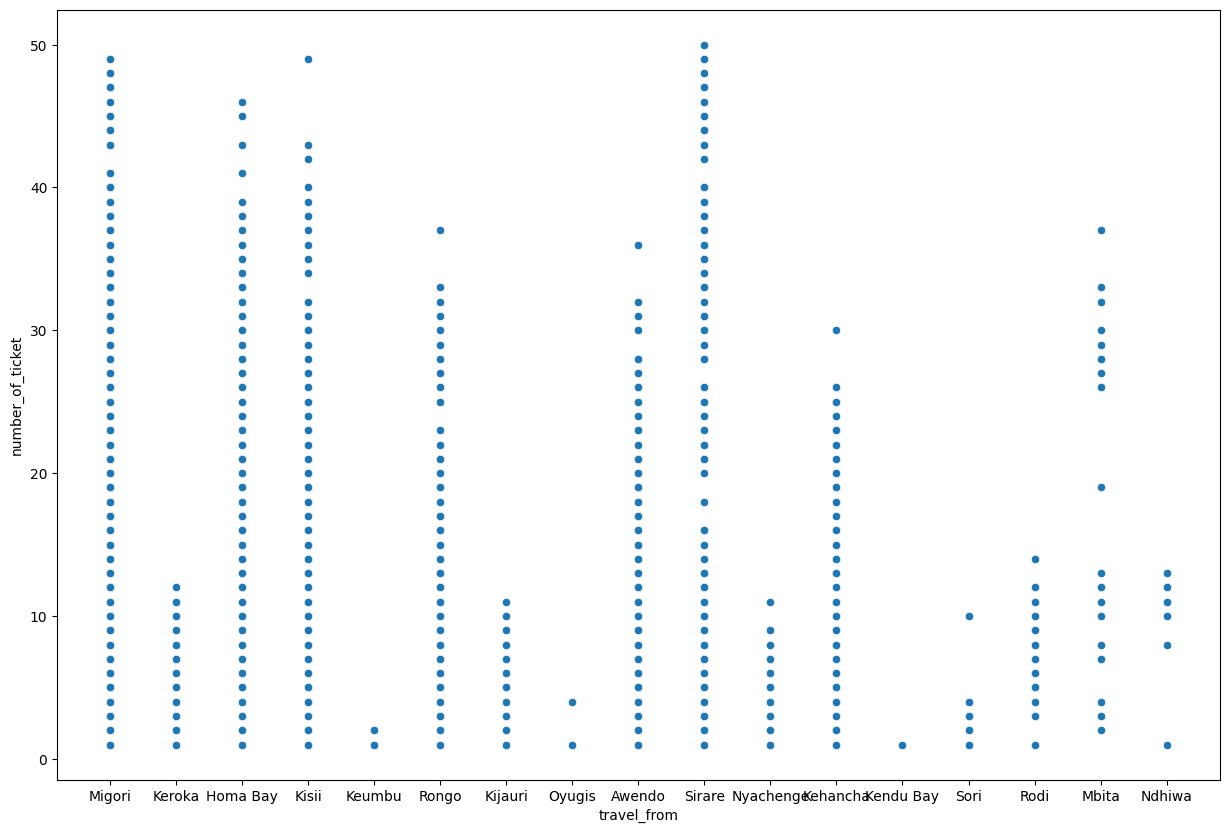

In [22]:
plt.figure(figsize=(15, 10))
sp = sns.scatterplot(x="travel_from", y="number_of_ticket", data=dpdt)

# **FEATURE ENGINEERING**

In [23]:
#concatinate travel date and travel time column and make a new feature called date.
dpdt["date"]=dpdt["travel_date"]+ " "+dpdt["travel_time"]

In [24]:
def  time_features(df):

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated
  dataset'''

  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [25]:
dpdt_new = time_features(dpdt)

In [26]:
dpdt_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


<Axes: xlabel='day_of_month', ylabel='number_of_ticket'>

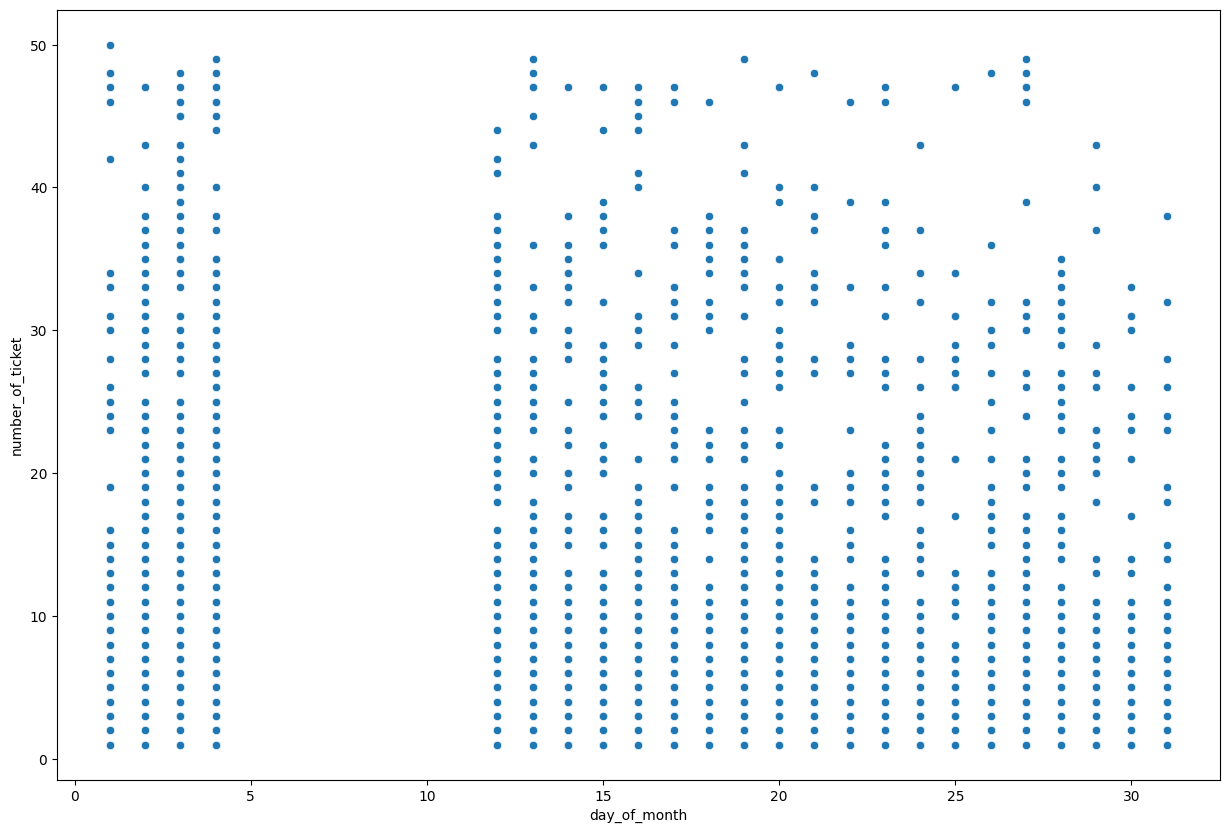

In [28]:
plt.figure(figsize=(15,10 ))
sns.scatterplot(x='day_of_month', y="number_of_ticket", data=dpdt)

**Comment**

* We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.


<Axes: xlabel='hour', ylabel='number_of_ticket'>

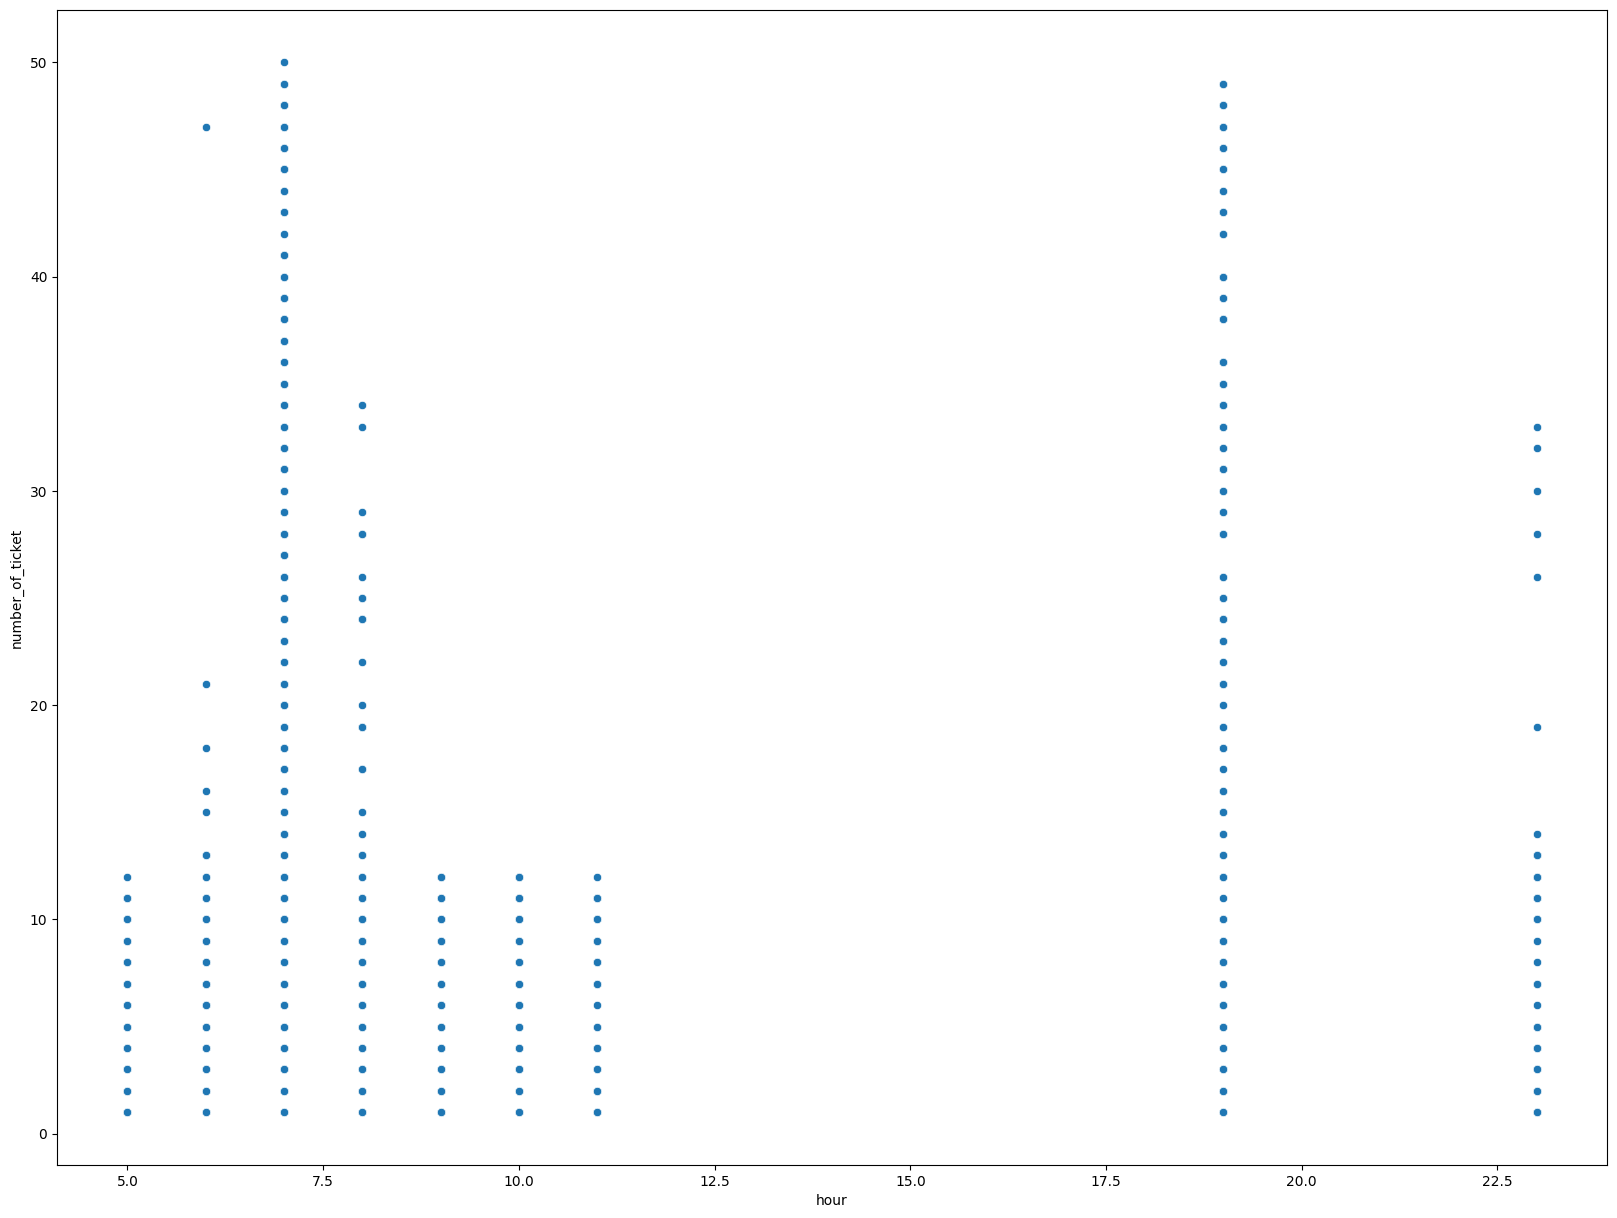

In [29]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x='hour', y="number_of_ticket", data=dpdt)

**Comment**
* We can see that most of the ticktes were sold at  7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

* From the above we can say that there is not ride between 12pm to 5.30Pm

In [30]:
dpdt_new["travel_time"] = dpdt_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [31]:
dpdt_new['period'] = np.nan

dpdt_new.loc[dpdt_new.travel_time < 7, 'period'] = 'em'
dpdt_new.loc[(dpdt_new.travel_time >= 7) & (dpdt_new.travel_time < 11), 'period'] = 'am'
dpdt_new.loc[(dpdt_new.travel_time >= 11) & (dpdt_new.travel_time < 15), 'period'] = 'mid'
dpdt_new.loc[(dpdt_new.travel_time >= 15) & (dpdt_new.travel_time < 19), 'period'] = 'eve'
dpdt_new.loc[(dpdt_new.travel_time >= 19) & (dpdt_new.travel_time <= 24), 'period'] = 'pm'

pcount = dict(dpdt_new['period'].value_counts())
pcount

dpdt_new['hourly_travelers'] = np.log1p(dpdt_new['period'].map(pcount))

dcount = dict(dpdt_new["day_of_year"].value_counts())
dpdt_new["daily_travelers"] = np.log1p(dpdt_new["day_of_year"].map(dcount))
dpdt_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [32]:
dpdt.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [33]:
new_column = ['day_of_year','daily_travellers','minute','day_of_month','hourly_travellers','is_weekend','day_of_week']

In [34]:
transport_dpdt=dpdt_new.copy()

In [35]:
transport_dpdt.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [36]:
transport_dpdt.shape

(6249, 21)

In [37]:
transport_dpdt.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [38]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
transport_dpdt['month'].replace(dict_cov,inplace=True)

In [39]:
transport_dpdt.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [40]:
transport_dpdt.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [41]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_dpdt['day_of_month'].replace(conv_dict,inplace=True)

In [42]:
transport_dpdt['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [43]:
transport_dpdt.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,2,am,8.494743,3.871201


In [44]:
# function to find the characterstics of the variable in the dataframe.
def data_characterization(df):
  '''This function takes dataframe as an argument and returns
    the characterstics of the features of the dataframe'''
  characterized_df = pd.DataFrame(columns=['Columns name',	'Type', 'unique values Count', 'Count Nan values','Ratio Nan values','Unique values',	'Max',	'Min','Mean','std'])
  for col in df.columns:
    try:
      characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()),
                                                  'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
                                                  'Unique values':df[col].unique(),	'Max':df[col].max(),	'Min':df[col].min(),'Mean':df[col].mean(),'std':df[col].std()},
                                                ignore_index=True)
    except:
      characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()),
                                                  'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
                                                  'Unique values':df[col].unique(),	'Max':np.nan,	'Min':np.nan,'Mean':np.nan,'std':np.nan},
                                                ignore_index=True)
  return characterized_df

In [45]:
data_characterization(transport_dpdt)

,Columns name,Type,unique values Count,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean,std
0,ride_id,int64,6249,0,0.0,"[1442, 5437, 5710, 5777, 5778, 5781, 5784, 578...",20117,1442,9963.644583,2296.304872
1,travel_date,object,149,0,0.0,"[17-10-17, 19-11-17, 26-11-17, 27-11-17, 20-04...",NaN,NaN,NaN,NaN
2,travel_time,float64,78,0,0.0,"[7.25, 7.2, 7.083333333333333, 7.1666666666666...",23.166667,5.0,8.239828,2.951814
3,travel_from,object,17,0,0.0,"[Migori, Keroka, Homa Bay, Kisii, Keumbu, Rong...",NaN,NaN,NaN,NaN
4,car_type,object,2,0,0.0,"[Bus, shuttle]",NaN,NaN,NaN,NaN
5,max_capacity,int64,2,0,0.0,"[49, 11]",49,11,30.392223,18.997471
6,number_of_ticket,int64,50,0,0.0,"[1, 5, 31, 26, 2, 3, 11, 4, 9, 6, 8, 10, 24, 7...",50,1,8.264522,8.632968
7,date,datetime64[ns],4579,0,0.0,"[2017-10-17T07:15:00.000000000, 2017-11-19T07:...",2018-12-04 23:10:00,2017-01-12 05:00:00,2018-03-03 16:51:43.226116352,128 days 10:31:39.159274134
8,day_of_week,int64,7,0,0.0,"[1, 6, 0, 4, 3, 2, 5]",6,0,2.913906,1.958013
9,day_of_year,int64,149,0,0.0,"[290, 323, 330, 331, 110, 109, 108, 107, 106, ...",365,1,158.033765,122.219956


In [46]:
# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  return data

In [47]:
data = find_difference_bw_bus(transport_dpdt)

In [48]:
data_characterization(data)

,Columns name,Type,unique values Count,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean,std
0,ride_id,int64,6249,0,0.00000,"[6654, 12926, 12929, 12935, 12924, 8627, 8628,...",20117,1442,9963.644583,2296.304872
1,travel_date,object,149,0,0.00000,"[05-12-17, 01-04-18, 13-01-18, 14-01-18, 15-01...",NaN,NaN,NaN,NaN
2,travel_time,float64,78,0,0.00000,"[7.133333333333334, 7.2, 7.216666666666667, 8....",23.166667,5.0,8.239828,2.951814
3,travel_from,object,17,0,0.00000,"[Awendo, Homa Bay, Kehancha, Kendu Bay, Keroka...",NaN,NaN,NaN,NaN
4,car_type,object,2,0,0.00000,"[Bus, shuttle]",NaN,NaN,NaN,NaN
5,max_capacity,int64,2,0,0.00000,"[49, 11]",49,11,30.392223,18.997471
6,number_of_ticket,int64,50,0,0.00000,"[2, 20, 9, 15, 6, 1, 4, 5, 8, 12, 3, 17, 18, 1...",50,1,8.264522,8.632968
7,date,datetime64[ns],4579,0,0.00000,"[2017-05-12T07:08:00.000000000, 2018-01-04T07:...",2018-12-04 23:10:00,2017-01-12 05:00:00,2018-03-03 16:51:43.226116096,128 days 10:31:39.159274134
8,day_of_week,int64,7,0,0.00000,"[4, 3, 5, 6, 0, 1, 2]",6,0,2.913906,1.958013
9,day_of_year,int64,149,0,0.00000,"[132, 4, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...",365,1,158.033765,122.219956


In [49]:
data.isnull().sum()

ride_id                           0
travel_date                       0
travel_time                       0
travel_from                       0
car_type                          0
max_capacity                      0
number_of_ticket                  0
date                              0
day_of_week                       0
day_of_year                       0
day_of_month                      0
year_woy                          0
hour                              0
minute                            0
is_weekend                        0
year                              0
quarter                           0
month                             0
period                            0
hourly_travelers                  0
daily_travelers                   0
Time_gap_btw_0_1_next_bus         1
Time_gap_btw_0_1_previous_bus     1
Time_gap_btw_0_2_next_bus         3
Time_gap_btw_0_2_previous_bus     3
Time_gap_btw_0_3_next_bus         3
Time_gap_btw_0_3_previous_bus     3
Time_gap_btw_next_previous_b

**Comment:-**We see that there are some null values present in the dataset so let us reomove those null values

In [50]:
data.dropna(inplace=True)

In [51]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,...,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,...,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,...,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,...,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,...,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


In [52]:
from datetime import datetime  #Used for analysing the date variable
from datetime import timedelta

Now let us find the distance of each origin point from the distination point.
I used Nirobi Map to estimate the distance from origin point to destination map.




In [53]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)

In [54]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)

In [55]:
data["Speed"]=data.travel_from_time/data.travel_from_distance

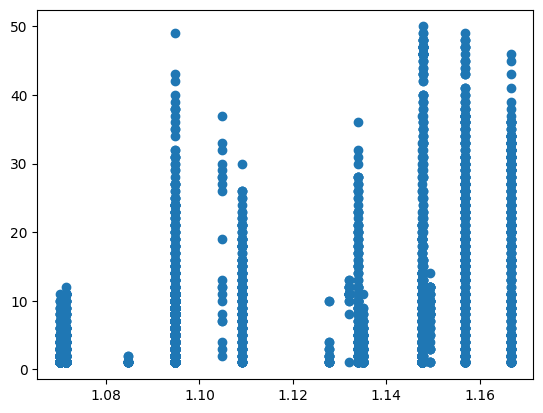

In [56]:
plt.scatter(data['Speed'],data['number_of_ticket'])

In [57]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys():
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
data["is_rush_hour"]=0
data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

### **Encoding Categorical features**

In [58]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)

In [59]:
data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,year_woy,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,6654,05-12-17,7.133333,1,49,2,2017-05-12 07:08:00,4,132,201719,...,0,0,0,0,1,0,0,0,0,1
5530,12926,01-04-18,7.133333,1,49,20,2018-01-04 07:08:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5533,12929,01-04-18,7.200000,1,49,2,2018-01-04 07:12:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5539,12935,01-04-18,7.216667,1,49,9,2018-01-04 07:13:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5528,12924,01-04-18,8.000000,1,49,15,2018-01-04 08:00:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0


# **TRAINING THE MODEL**

In [60]:
keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket',
               'period'
]

In [61]:
features = data.drop(not_used_cols,axis=1).columns

In [62]:
features

Index(['car_type', 'day_of_week', 'day_of_year', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'hourly_travelers', 'daily_travelers',
       'Time_gap_btw_0_1_next_bus', 'Time_gap_btw_0_1_previous_bus',
       'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_0_2_previous_bus',
       'Time_gap_btw_0_3_next_bus', 'Time_gap_btw_0_3_previous_bus',
       'Time_gap_btw_next_previous_bus', 'travel_from_distance',
       'travel_from_time', 'Speed', 'hod_arrived_date', 'minute_arrived_date',
       'is_rush_hour', 'travel_from_Awendo', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'day_of_month_1', 'day_of_month_2',
       'day_of_month_3', 'month_1', 'month_2', 'month_3'],
      dtype='object

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [64]:
data[features].head()

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,1,4,132,7,8,0,2017,2,8.494743,4.025352,...,0,0,0,0,1,0,0,0,0,1
5530,1,3,4,7,8,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5533,1,3,4,7,12,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5539,1,3,4,7,13,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5528,1,3,4,8,0,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0


## **Training XGboost**

In [65]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [66]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math

In [67]:
import xgboost as xgb
# dataset_pr = data[]
used_cols = ['day_of_year']
X = data[used_cols].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print('Train score:',train_score)
print('Test score:',test_score)
print('adj_r2:',adj_r2)
print('r2:',r2)
print('r2_train:',r2_train)
print_metrics(y_test, y_pred)

[10:05:59] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.0366514172923893
Test score: -0.03183246985935906
adj_r2: -0.03233335940783455
r2: -0.03183246985935906
r2_train: 0.0366514172923893
MSE is 77.43802988983096
RMSE is 8.799888061210265
RMSE is -0.03183246985935906
MAE is 5.970963276496336
MAPE is 225.0609510932367


## **Random Forest Regressor**

In [68]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
X = data[features].copy()
y = data['number_of_ticket'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [70]:
dec_reg =RandomForestRegressor()

In [71]:
dec_reg.fit(X_train,y_train)

RandomForestRegressor()

In [73]:
dec_reg.score(X_train,y_train)

0.9503719198028169

In [74]:
dec_reg.score(X_test,y_test)

0.644948504537733

**Comment:-**Model seems to be overfitted.


## **grid search cv on Random forest**

In [75]:
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]
}

In [76]:
X = data[features].copy()
y = data['number_of_ticket'].copy()
dec_reg =RandomForestRegressor()
rf_grid =GridSearchCV(dec_reg,param_grid=parameters, verbose=1,cv=2)
rf_grid.fit(X, y)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=1)

In [77]:
rf_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [78]:
rf_optimal_model =rf_grid.best_estimator_
rf_train_preds = rf_optimal_model.predict(X_train)
rf_test_preds = rf_optimal_model.predict(X_test)
train_score= rf_optimal_model.score(X_train,y_train)
test_score = rf_optimal_model.score(X_test,y_test)

#Find R-squared value
r2 = r2_score(y_test, rf_test_preds)
r2_train = r2_score(y_train, rf_train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test,rf_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Train Score: ',train_score)
print('Test Score: ',test_score)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, rf_test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, rf_test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, rf_test_preds)))
print('R2 Score: ',r2)
print('R2_train Score: ',r2_train)
print('Adjusted R2 Score: ',adj_r2)

Train Score:  0.6335686552760641
Test Score:  0.6308138752132784
Mean Squared Error (MSE):  27.707061951676867
Mean Absolute Error (MAE):  3.3507963668154526
Root Mean Squared Error (MSE):  5.263749799494355
R2 Score:  0.6308138752132784
R2_train Score:  0.6335686552760641
Adjusted R2 Score:  0.6227602363979012


In [79]:
import warnings
warnings.filterwarnings('ignore')

## **Grid Search CV on XGboost algorithm**

In [80]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

In [81]:
params = {"min_child_weight":[10,20],
            'eta': [0.004,0.04,4,40],
            'colsample_bytree':[0.7],
            'max_depth': [7,9,11],
          }

In [82]:
X = data[features].copy()
y = data['number_of_ticket'].copy()

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [83]:
reg_optimal_model =reg_gs.best_estimator_

In [84]:


train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [85]:
reg_optimal_model.score(X_train,y_train)

0.8440185003823177

In [86]:
reg_optimal_model.score(X_test,y_test)

0.8405406646754021

In [87]:
#Find R-squared value
r2_test = r2_score(y_test, test_preds)
r2_train = r2_score(y_train, train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('r2_test :',r2_test)
print('r2_train :',r2_train)
print('adj_r2 :',adj_r2)

r2_test : 0.8405406646754021
r2_train : 0.8440185003823177
adj_r2 : 0.8370621268696102


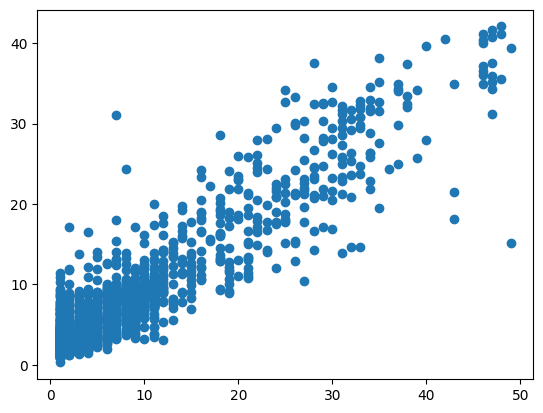

In [88]:
plt.scatter(y_test,test_preds)

In [89]:
importances = reg_optimal_model.feature_importances_

In [90]:
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [91]:
importance_df = pd.DataFrame(importance_dict)

In [92]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [93]:
imp_features = important_features['Feature'].tolist()

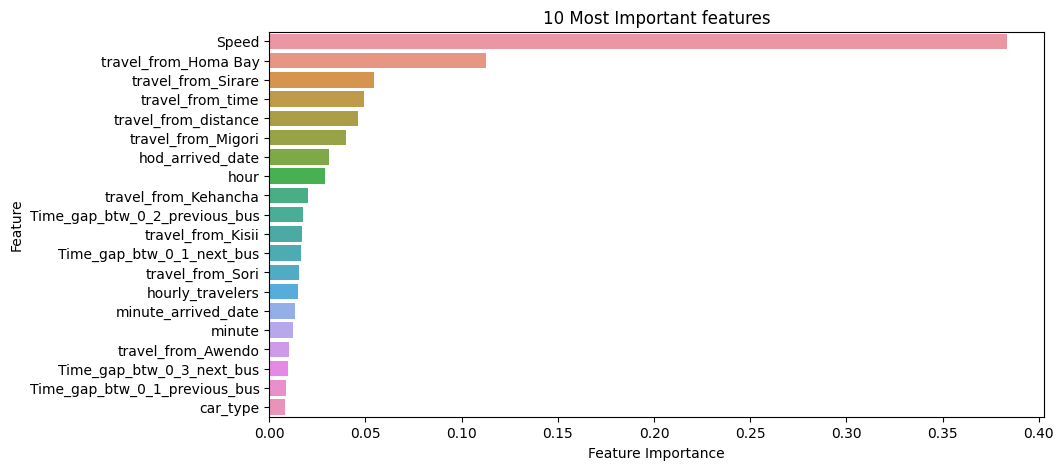

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(y = important_features['Feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

## **Evaluating the model**

In [95]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('R2 Score: ',r2_test)
print('Adjusted R2 Score: ',adj_r2)

Mean Squared Error (MSE):  11.967269043938767
Mean Absolute Error (MAE):  2.2471472935608356
Root Mean Squared Error (MSE):  3.4593740826829884
R2 Score:  0.8405406646754021
Adjusted R2 Score:  0.8370621268696102


# **Conclusion**

**We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso), GBM,Random Forest Regressor, XGboost regresssor. and Also we tuned the parameters of Random forest regressor and XGboost regressor and also found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.**